In [1]:
import numpy as np
from hankel_dmd import *
from numerical_solvers_and_models import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

## The Extended and Hankel-DMD Methods

### Extended Dynamic Mode Decomposition

The Extendended DMD (EDMD) method begins with the data set $\left\{{\bf y}_{j}\right\}_{j=1}^{N_{T}+1}$ where
$$
{\bf y}_{j} = \varphi(t_{j};{\bf x}), ~ t_{j+1} = t_{j} + \delta t, ~ {\bf x}\in \mathbb{R}^{N_{s}}
$$
where $\delta t$ is the time step at which data is sampled.  We define the associated Hilbert space of *observables*, say $L_{2}\left(\mathbb{R}^{N_{s}},\mathbb{R},\mu\right)$, or more tersely as $L_{2}\left(\mathcal{O}\right)$, so that $g \in L_{2}\left(\mathcal{O}\right)$ if
$$
\int_{\mathbb{R}^{N_{s}}} \left|g({\bf x})\right|^{2} d\mu\left({\bf x}\right) < \infty,
$$
where $\mu$ is some appropriately chosen measure.  This makes the infinite-dimensional Koopman operator $\mathcal{K}^{t}$ a map such that  $
\mathcal{K}^{t}:L_{2}\left(\mathcal{O}\right)\rightarrow L_{2}\left(\mathcal{O}\right).$  


Following Williams(2015), Williams2(2016), given our time snapshots $\left\{{\bf y}_{j}\right\}_{j=1}^{N_{T}+1}$, we suppose that any observable $g({\bf x})$ of interest lives in a finite-dimensional subspace $\mathcal{F}_{D}\subset L_{2}\left(\mathcal{O}\right)$ described by a given basis of observables $\left\{\psi_{l}\right\}_{l=1}^{N_{o}}$ so that 
$$
g({\bf x}) = \sum_{l=1}^{N_{o}}a_{l}\psi_{l}\left({\bf x}\right).
$$
Now by observable, we really can use any function.  The most natural observables are the projections along the canonical Cartesian axes, i.e. 
$$
\psi_{l}({\bf x}) = x_{l}, ~ l=1,\cdots, N_{s}.
$$
If we stick to this space of observables, the EDMD method reduces to the standard DMD method.  Thus the idea with EDMD is to include more nonlinear observables to hopefully represent a richer subspace of dynamics and thereby make the approximation of corresponding Koopman operator more accurate and sophisticated.  Hope springs eternal of course.  


Given this ansatz, we then suppose that  
\begin{align*}
\mathcal{K}^{\delta t}g({\bf x}) = &\sum_{l=1}^{N_{o}}a_{l}\psi_{l}\left(\varphi\left(\delta t, {\bf x}\right) \right) \\
 = & \sum_{l=1}^{N_{o}}\psi_{l}({\bf x})\left(\mathbf{K}^{T}_{a}{\bf a} \right)_{l} + r({\bf x};\mathbf{K}_{a})
\end{align*}
where $r({\bf x};\mathbf{K}_{a})$ is the associated error which results from the introduction of the finite-dimensional approximation of the Koopman operator represented by $\mathbf{K}_{a}$.  One then finds $\mathbf{K}_{a}$ via the optimization problem
\begin{align*}
\mathbf{K}_{a} = & \mbox{arg min}_{\mathbf{K}} \left|r({\bf x};\mathbf{K})\right|^{2}\\
= & \mbox{arg min}_{\mathbf{K}}\sum_{j=1}^{N_{T}}\left|\sum_{l=1}^{N_{o}}\left(a_{l}\psi_{l}({\bf y}_{j+1}) - \psi_{l}({\bf y}_{j})\left(\mathbf{K}^{T}{\bf a}\right)_{l}\right) \right|^{2}\\
= & \mbox{arg min}_{\mathbf{K}} \sum_{j=1}^{N_{T}}\left|\left<\mathbf{\Psi}_{j+1} - \mathbf{K}\mathbf{\Psi}_{j} ,{\bf a}^{\ast}\right> \right|^{2},
\end{align*}
where ${\bf a}=(a_{1} \cdots a_{N_{o}})^{T}$, $\mathbf{\mathbf{\Psi}}_{j} = \left(\psi_{1}({\bf y}_{j}) \cdots \psi_{N_{o}}({\bf y}_{j}) \right)^{T}$, the inner product $\left<,\right>$ is the standard one over $\mathbb{C}^{N_{o}}$, and the $\ast$ symbol denotes complex conjugation.  We then readily find the solution to the minimization problem via the formula 
\begin{equation}
\left(\sum_{j=1}^{N_{T}}\mathbf{\Psi}_{j}^{\ast}\mathbf{\Psi}_{j}^{T}\right)\mathbf{K}_{a}^{T} = \sum_{j=1}^{N_T}\mathbf{\Psi}_{j}^{\ast}\mathbf{\Psi}_{j+1}^{T}.
\label{edmdfit}
\end{equation}


This problem can be rewritten in the more compact form 
\begin{equation}
\mathbf{K}_{a} \mathbf{\Psi}_{-}\mathbf{\Psi}_{-}^{\dagger} = \mathbf{\Psi}_{+}\mathbf{\Psi}_{-}^{\dagger},
\label{dmd_mtrx_inv}
\end{equation}
where the $N_{o}\times N_{T}$ matrices $\mathbf{\Psi}_{\pm}$ are given by 
$$
\mathbf{\Psi}_{-} = \left\{\mathbf{\Psi}_{1}~ \mathbf{\Psi}_{2}~ \cdots ~\mathbf{\Psi}_{N_{T}} \right\}, \quad \mathbf{\Psi}_{+} = \left\{\mathbf{\Psi}_{2} ~\mathbf{\Psi}_{3} ~\cdots ~\mathbf{\Psi}_{N_{T}+1} \right\},
$$
and where $\dagger$ denotes the Hermitian conjugate of a matrix.  We therefore see, in line with the larger DMD literature that finding $\mathbf{K}_{a}$ is equivalent to solving the optimization problem 
\begin{equation}\label{eqn:dmd1}
    \mathbf{K}_{a} = \underset{\mathbf{K}}{\mathrm{argmin}}\left|\left|\mathbf{\Psi}_{+} - \mathbf{K}\mathbf{\Psi}_{-}\right|\right|_{F}^{2},
\end{equation}
where $\left|\left|\cdot\right|\right|_{F}$ is the Frobenius norm.  In practice, we solve this equation using the Singular Value Decomposition (SVD) of $\mathbf{\Psi}_{-}$ so that
\begin{align*}
    \mathbf{\Psi}_{-} = \mathbf{U} \mathbf{\Sigma} \mathbf{W}^\dagger.
\end{align*}
This then gives us 
\begin{equation*} \label{eqn:dmd2}
    \mathbf{K}_{a} = \mathbf{\Psi}_{+} \mathbf{W} \mathbf{\Sigma}^{-1} \mathbf{U}^{\dagger}, 
\end{equation*} 
with the corresponding error in the Frobernius norm $E_{r}(\mathbf{K}_{a})$ where
$$
E_{r}(\mathbf{K}_{a}) = \left|\left|\mathbf{\Psi}_{+}\left(I - \mathbf{W}\mathbf{W}^{\dagger} \right)\right|\right|_{F}.
$$


To complete the algorithm, after diagonalizing $\mathbf{K}_{a}$ so that 
$$
\mathbf{K}_{a} = \mathbf{V} \mathbf{T} \mathbf{V}^{-1}, ~\mathbf{T}_{jj} = t_{j}, 
$$
then one can show that $\lambda_{j} = \ln(t_{j})/\delta t$ and the Koopman eigenfunctions $\phi_{j}({\bf x})$ are approximated by the formula 
$$
\phi_{j}({\bf x}) = \sum_{m=1}^{N_{o}}\psi_{m}({\bf x})\mathbf{V}^{-1}_{jm}, ~ j=1,\cdots,N_{o},
$$
or in vector/matrix notation
$$
\begin{pmatrix}\phi_{1}({\bf x})\\ \vdots \\ \phi_{N_{o}}({\bf x}) \end{pmatrix} = V^{-1}\begin{pmatrix}\psi_{1}({\bf x})\\ \vdots \\ \psi_{N_{o}}({\bf x}) \end{pmatrix}.
$$
From here, one can approximate the dynamics via the reconstruction formula  
$$
{\bf y}(t;{\bf x})\approx \sum_{j=1}^{N_{o}}{\bf k}_{j}e^{t\lambda_{j}}\phi_{j}({\bf x}),
$$
where the *Koopman modes* ${\bf k}_{j}\in \mathbb{C}^{N_{s}}$ solve the initial-value problem 
$$
{\bf x} = \sum_{j=1}^{N_{o}}{\bf k}_{j} \phi_{j}({\bf x}).  
$$

Again, in matrix/vector notation, keeping in mind that ${\bf x}\in \mathbb{R}^{N_{s}}$ and that in general $N_{s}\neq N_{o}$, we have 
$$
{\bf x} = {\bf K}_{M}\begin{pmatrix}\phi_{1}({\bf x})\\ \vdots \\ \phi_{N_{o}}({\bf x}) \end{pmatrix}
$$
where ${\bf K}_{M}$ is the $N_{s}\times N_{o}$ matrix whose columns are the Koopman modes ${\bf k}_{j}$.  As can be seen then, generically, one can only find the Koopman modes through least-squares solutions of the non-square problem.  In this regard, one would do well to have information from as many initial conditions as possible to overdetermine the problem.  To wit, if we had a collection of initial conditions $\left\{{\bf x}_{k}\right\}_{k=1}^{N_{C}}$ with corresponding path data, by concantenating across observables column wise, we would arrive at the following matrix problem for determining ${\bf K}_{M}$
$$
{\bf X} = {\bf K}_{M} \mathbf{\Phi}
$$
where
$$
{\bf X} = \left({\bf x}_{1} \cdots {\bf x}_{N_{C}} \right), ~ 
\mathbf{\Phi} = \begin{pmatrix} 
\phi_{1}({\bf x}_{1}) & \cdots & \phi_{1}({\bf x}_{N_{C}}) \\
\phi_{2}({\bf x}_{1}) & \cdots & \phi_{2}({\bf x}_{N_{C}}) \\
\vdots & \vdots & \vdots \\ 
\phi_{N_{o}}({\bf x}_{1}) & \cdots & \phi_{N_{o}}({\bf x}_{N_{C}})
\end{pmatrix}
$$

### Hankel Dynamic Mode Decomposition

So the unending dilemma with EDMD is what space of obersvables should one choose?  And there are stacks of papers now written on one ought to or ought not to do as such.  An especially promising approach is to build on the idea of Takens embeddings (discussed in greater detail next) through the use of *Hankel matrices*.  To wit, suppose we have an affiliated scalar measurement of our time series, say $\left\{f({\bf y}_{j})\right\}_{j=1}^{N_{T}+1}$ where 
$$
f({\bf y}_{j}) \in \mathbb{R}.
$$
From this, by introducing a *window* size $N_{w}$ we build the affiliated Hankel matrix $\tilde{{\bf H}}_{f}\left({\bf x}\right)$ where 
$$
\tilde{{\bf H}}_{f}\left({\bf x}\right) = \begin{pmatrix}
f({\bf y}_{1}) & \cdots & f({\bf y}_{N_{w}})\\
f({\bf y}_{2}) & \cdots & f({\bf y}_{N_{w+1}})\\
\vdots & \vdots & \vdots \\
f({\bf y}_{N_{T+1}-(N_{w}-1)}) & \cdots & f({\bf y}_{N_{T+1}})
\end{pmatrix}, ~ {\bf y}_{j} = \varphi(t_{j};{\bf x}).
$$
What one sees then is that each row of $\tilde{H}_{f}({\bf x})$ is some iteration of the Koopman operator $\mathcal{K}^{\delta t}$.  From here then, we define each row of $N_{w}$ time steps to be its own separate observable $\psi_{l}({\bf x})$, i.e. 
$$
\psi_{l}({\bf x}) = \mathcal{K}^{l \delta t}f({\bf x}), ~ l=1,\cdots,N_{T+1}-(N_{w}-1).
$$
One then proceeds as above with the EDMD algorithm.  Note, and this is important, $N_{w}$ is chosen by the user using... intution and heuristics.  See the discussion of Takens embeddings below to get a flavor of what I mean.  

Now, if one has data along multiple initial conditions, say $\left\{{\bf x}_{k}\right\}_{k=1}^{N_{C}}$, we can extend the above algorithm by concatenating Hankel matrices so that we perform EDMD on the combined matrix $\tilde{{\bf H}}_{C}$ so that 
$$
\tilde{{\bf H}}_{C} = \left(\tilde{H}_{f}\left({\bf x}_{1}\right) ~ \cdots ~ \tilde{H}_{f}\left({\bf x}_{N_{C}}\right) \right)
$$
The inclusion of other observables can be done in a similar fashion.  With this said, some care must be taken in applying EDMD to the above concantenated matrix so as to make sure that the appliction of the Koopman operator is applied properly; see the code for this.  

In [2]:
def path_test(query_pts, initconds, phim, evls, window):
    Nobs = np.shape(phim)[0]
    Nqp = np.shape(query_pts)[0]
    Ns = np.shape(query_pts)[1]
    numiconds = int(np.shape(phim)[1]/(window - 1))
    iconphim = np.zeros((Nobs, numiconds), dtype=np.complex128)
    
    for ll in range(numiconds):
        iconphim[:,ll] = phim[:,ll*(window-1)]
    
    u, s, vh = np.linalg.svd(iconphim,full_matrices=False)
    Kmat = (initconds.T) @ (np.conj(vh)).T @ np.diag(1./s) @ (np.conj(u)).T
    errnum = np.linalg.norm(initconds.T - Kmat @ iconphim)
    errdenom = np.linalg.norm(initconds)
    err = errnum/errdenom
    print("Error in first fit: %1.2e" % err)
    
    uk, sk, vhk = np.linalg.svd(Kmat,full_matrices=False)
    phi_query = np.conj(vhk).T @ np.diag(1./sk) @ np.conj(uk).T @ query_pts.T
    errnum = np.linalg.norm(query_pts.T - Kmat @ phi_query)
    errdenom = np.linalg.norm(query_pts)
    err = errnum/errdenom
    print("Error in second fit: %1.2e" % err)
    
    test_paths = np.zeros((Nqp, Ns, window), dtype=np.float64)
    test_paths[:,:,0] = query_pts
    eveciter = evls
    for ll in range(1,window):
        test_paths[:,:,ll] = np.real((Kmat @ np.diag(eveciter) @ phi_query)).T
        eveciter = eveciter * evls
    return test_paths

## Takens Embedding for the Lorenz Equation

Just to get our feet wet and to build some more direct familiarity with Takens Embedding Theorem, we turn to one of the classics of dynamical systems, the Lorenz-63 equations, given by the system

\begin{align}
\dot{y}_{1} = & \sigma(y_{2}-y_{1})\\
\dot{y}_{2} = & ry_{1} - y_{2} - y_{1}y_{3}\\
\dot{y}_{3} = & -by_{3} + y_{1}y_{2}
\end{align}

Following the approach laid out in *Broomhead et al, Physica D, 217-236, 1986*, we use the parameter values

$$
\sigma = 10, \quad b = \frac{8}{3}, \quad r = 28
$$

starting from an initial condition of ${\bf x} = (5,6,7)$.  A general solution for generic initial condition ${\bf x}$ can be described via the flow map $\varphi(t;{\bf x})$ which in coordinates is given by
$$
\varphi(t;{\bf x}) = (y_{1}(t;{\bf x}), y_{2}(t;{\bf x}), y_{3}(t;{\bf x})), \quad y_{j}(0;{\bf x}) = x_{j}, ~ j=1,2,3.
$$

We numerically solve this on the time interval $0\leq t \leq 20$ using a fourth order Runge-Kutta scheme with a time step of $\delta t=.003$.  As we expect, we get the now famous *Lorenz Butterfly* when we parametrically plot the solution paths against one another.  

In [3]:
sigma = 10.
bval = 8./3.
rval = 28.
dt = .05
t0 = 0.
tf = 90.
NT = int((tf-t0)/dt)
tvals = np.linspace(t0,tf,NT+1)
numiconds = 80
initconds = np.zeros((numiconds,3), dtype=np.float64)
rawdata = [None]*numiconds
x0 = np.array([3.1, 3.1, rval-1])
fhandle = lambda x: lorentz(x,sigma,rval,bval)
for ll in range(numiconds):
    initconds[ll,:] = 8.*(np.random.rand(3) - .5) + x0
    rawdata[ll] = timestepper(initconds[ll,:], t0, tf, dt, fhandle)

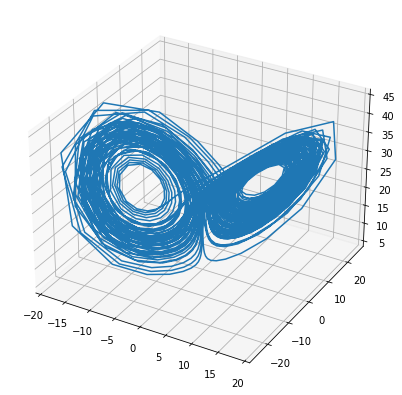

In [4]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
traj = rawdata[0]
ax.plot3D(traj[0,:], traj[1,:], traj[2,:])

In [5]:
window = NT+1-10
thrshhld = 5.
obs1 = lambda x: x[0]
obs2 = lambda x: x[1]
obs3 = lambda x: x[2]
#obs = [obs1, obs2, obs3]
obs = [obs1]
evls, phim, kvecs = hankel_dmd(rawdata, obs, window, thrshhld)
recon = path_reconstruction(phim, window, initconds)

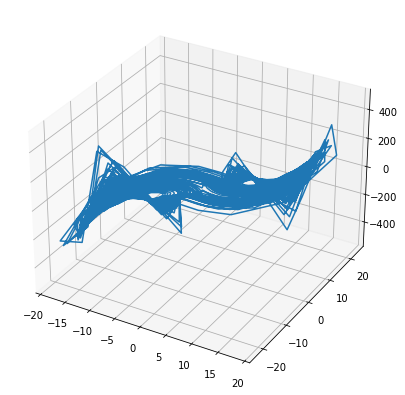

In [6]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.plot3D(recon[0,:window], recon[1,:window], recon[2,:window])

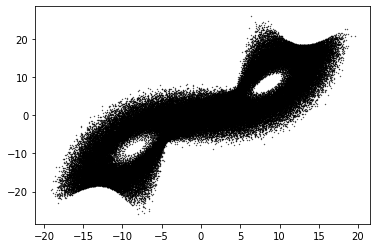

In [7]:
plt.scatter(recon[0,:],recon[1,:],color='k', s=.1)
#plt.plot(rawdata[0,:window],color='r')

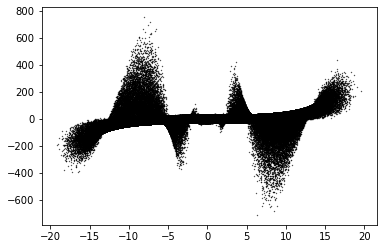

In [8]:
plt.scatter(recon[0,:], recon[2,:],color='k',s=.1)

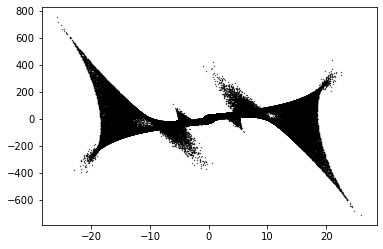

In [9]:
plt.scatter(recon[1,:], recon[2,:],color='k',s=.1)

In [10]:
#wval, pcnts = kennel_window_comp(rawdata[0,:],lag)

Now what of all this Takens Embedding business?  In this case, we are going to just use the measurement of $x(t)$, and from this one dimensional time series, we hope to recreate some reasonable approximation to the strange attractor seen above.  

To do this, we need to determine two critical parameters, the *time lag* $\tau$, and the *embedding dimension* $d_{E}$.  Chosen correctly, by constructing the mapping $\phi : \mathbb{R} \rightarrow \mathbb{R}^{d_{E}}$ such that 

$$
\phi({\bf x}) = \left(y_{1}(t;{\bf x}), ~ y_{1}(t-\tau;{\bf x}), \cdots, y_{1}(t-(d_{E}-1)\tau;{\bf x})  \right),
$$

then $\phi$ should be an embedding of the butterfly in this particular example.  We emphasize that almost any reasonable scalar measurement of the three dimensional time series would work here, but we're picking this one for convenience and clarity.  

An educated guess for $\tau$ can be found in this case by looking at the affiliated power spectra of the numerically generated time series $y_{1}(t;{\bf x})$.  To wit, we use the following code.

## Implementing the Kennel et al embedding dimension metric.  

So, once we choose an embedding dimension, we of course have to wonder how accurate, and ultimately efficient of a choice that is.  To address this issue, we, as with Gilpin, follow the methodology laid out in *Kennel et. al. (PRA, 45, 1992)*.   Again, as above, we suppose that we have a time series say $\left\{f({\bf y}_{j})\right\}_{j=1}^{N_{T}+1}$, and we build the affliated Hankel matrix $\tilde{\bf H}_{f}$ in the same way, thereby generating $N_{T}-N_{w}+1$ points in $\mathbb{R}^{N_{w}}$.  

Across these points (i.e. rows of $\tilde{\bf H}_{f}$), we need to determine for each point who their nearest neighbor is using the usual Euclidean metric in $\mathbb{R}^{N_{w}}$.  Generically the chance of a tie should be impossible, though we can cross that bridge when we come to it.  Once that is done, for each nearest neighbor, we need to compare one time step further to determine the impact of embedding into one higher dimension.  

In [11]:
dt = .02
t0 = 0.
tf = 6.
fhandle = lambda x: harmonic(x)
numicondshm = 256
initcondshm = np.zeros((numicondshm,2), dtype=np.float64)
rawdatahm = [None]*numicondshm
for ll in range(numicondshm):
    initcondshm[ll,:] = 2.*(np.random.rand(2) - .5)
    rawdatahm[ll] = timestepper(initcondshm[ll,:], t0, tf, dt, fhandle)

In [12]:
windowhm = int(tf/dt)+1 - 20
thrshhldhm = 13.
obs1 = lambda x: x[0]
obshm = [obs1]
evls, phim, kvecs = hankel_dmd(rawdatahm, obshm, windowhm, thrshhldhm)

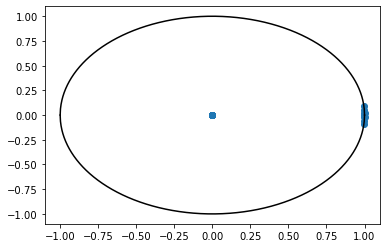

In [13]:
plt.scatter(np.real(evls),np.imag(evls))
yfun = lambda x: np.sqrt(1.-x**2.)
xvals = np.linspace(-1.,1.,1000)
plt.plot(xvals,yfun(xvals),color='k')
plt.plot(xvals,-yfun(xvals),color='k')

In [14]:
reconhm = path_reconstruction(phim, windowhm, initcondshm)

5.158886039366166e-10


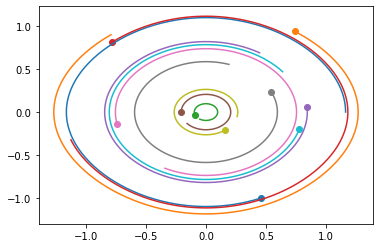

In [15]:
hm_recon_errors = np.zeros(numicondshm)
for ll in range(10):
    true_trajectory = rawdatahm[ll]
    plt.scatter(initcondshm[ll,0], initcondshm[ll,1])
    plt.plot(reconhm[0,ll*(windowhm-1):(ll+1)*(windowhm-1)],reconhm[1,ll*(windowhm-1):(ll+1)*(windowhm-1)])
    hm_recon_errors[ll] = np.linalg.norm(true_trajectory[:,:windowhm-1] - reconhm[:,ll*(windowhm-1):(ll+1)*(windowhm-1)])
print(np.max(hm_recon_errors))

In [16]:
new_init_cond = np.zeros((1, 2), dtype=np.float64)
new_init_cond[0,:] = 2.*(np.random.rand(2) - .5)
test_paths_hm = path_test(new_init_cond, initcondshm, phim, evls, windowhm)

Error in first fit: 6.47e-12
Error in second fit: 3.74e-12


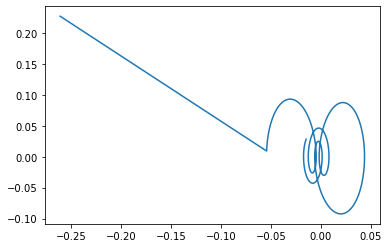

In [17]:
plt.plot(test_paths_hm[0,0,:], test_paths_hm[0,1,:])

## Hankel-DMD Study of the VanderPol Equation

In [18]:
mu = 1.5
dt = .02
t0 = 0.
tf = 20.
fhandle = lambda x: vanderpol(x,mu)
numicondsvp = 256
initcondsvp = np.zeros((numicondsvp,2), dtype=np.float64)
rawdatavp = [None]*numicondsvp
for ll in range(numicondsvp):
    initcondsvp[ll,:] = 8.*(np.random.rand(2) - .5)
    rawdatavp[ll] = timestepper(initcondsvp[ll,:], t0, tf, dt, fhandle)

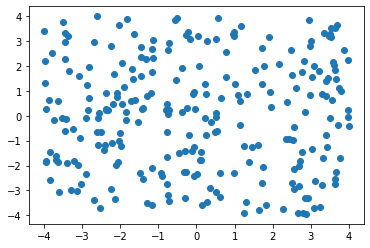

In [19]:
plt.scatter(initcondsvp[:,0], initcondsvp[:,1])

In [20]:
windowvp = int(tf/dt)+1 - 20
thrshhldvp = 13.
obs1 = lambda x: x[0]
obsvp = [obs1]
evls, phim, kvecs = hankel_dmd(rawdatavp, obsvp, windowvp, thrshhldvp)

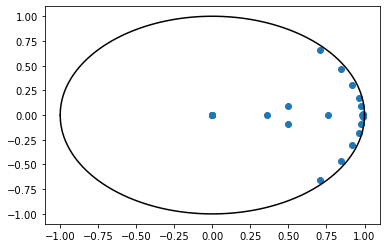

In [21]:
plt.scatter(np.real(evls),np.imag(evls))
yfun = lambda x: np.sqrt(1.-x**2.)
xvals = np.linspace(-1.,1.,1000)
plt.plot(xvals,yfun(xvals),color='k')
plt.plot(xvals,-yfun(xvals),color='k')

In [22]:
reconvp = path_reconstruction(phim, windowvp, initcondsvp)

0.0004127078224774372


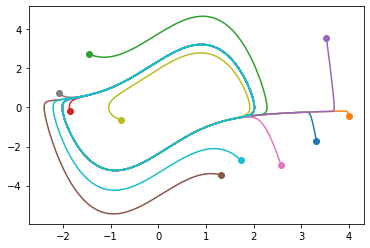

In [23]:
vp_recon_errors = np.zeros(numicondsvp)
for ll in range(10):
    true_trajectory = rawdatavp[ll]
    plt.scatter(initcondsvp[ll,0], initcondsvp[ll,1])
    plt.plot(reconvp[0,ll*(windowvp-1):(ll+1)*(windowvp-1)],reconvp[1,ll*(windowvp-1):(ll+1)*(windowvp-1)])
    vp_recon_errors[ll] = np.linalg.norm(true_trajectory[:,:windowvp-1] - reconvp[:,ll*(windowvp-1):(ll+1)*(windowvp-1)])
print(np.max(vp_recon_errors))

## Testing unknown initial conditions for Van der Pol

In [24]:
new_init_cond = np.zeros((1, 2), dtype=np.float64)
new_init_cond[0,:] = 8.*(np.random.rand(2) - .5)
test_paths_vp = path_test(new_init_cond, initcondsvp, phim, evls, windowvp)

Error in first fit: 9.61e-06
Error in second fit: 2.16e-08


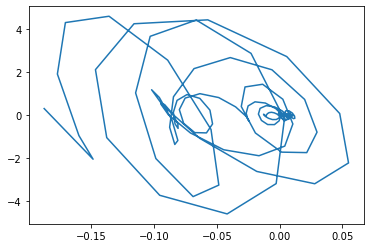

In [25]:
plt.plot(test_paths_vp[0,0,5:], test_paths_vp[0,1,5:])